# Proyecto de aprendizaje profundo
## Red Convolucional (CNN) con MNIST Fashion

**Equipo 3**
* Erick Isaac Lascano Otañez, A00836571
* Mateo Zepeda Pérez, A01722398
* Valeria Mariane Cárdenas Rodríguez, A01721814
* Sebastián Miramontes Soto, A01285296


## Pre-procesamiento de los datos

Importar Librerías

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [2]:
import matplotlib
import numpy as np
from numpy import array
from sklearn.metrics import classification_report
import time
from sklearn.metrics import confusion_matrix
import sklearn.model_selection as model_selection

Cargar datos

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Dimensiones de los datos

In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


Mismas dimensiones que MNIST (digitos)

Crear un diccionario que asocia ID label con su nombre (nombres obtenidos de [fashion-mnist-classnames.py]\(https://https://gist.github.com/mrdbourke/e0b82c52a1b374a108a47ce21c7f4835))

In [5]:
label_dicc = {
    0:"T-shirt/top",
    1:"Trouser",
    2:"Pullover",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9:"Ankle Boot"
}

Desplegar ejemplos de la base de datos

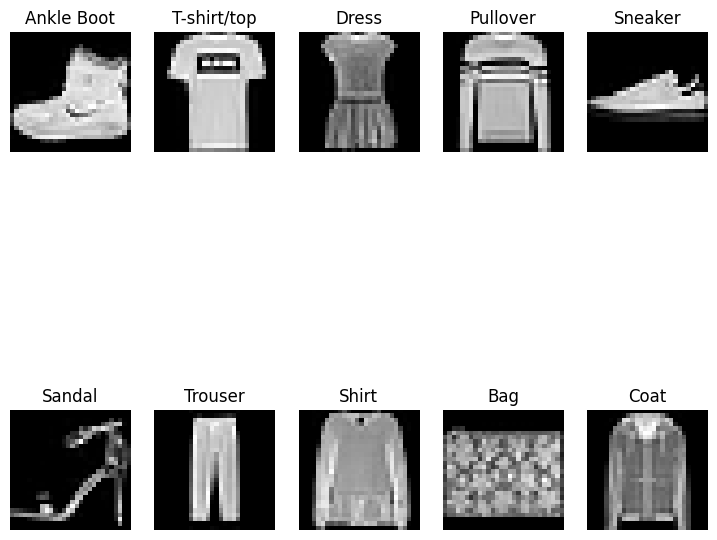

In [6]:
cc = [0,1,3,5,6,8,21,18,23,28]
fig=plt.figure(figsize=(9,9))
k=1
for i in cc:
  fig.add_subplot(2, 5, k)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(label_dicc[y_train[i]])
  plt.axis('off')
  k += 1

Normalizar datos

In [7]:
x_train = x_train / 255.0
x_test = x_test / 255.0

One hot encoding de las clases, vector de tamaño n

In [8]:
ytrain = tf.keras.utils.to_categorical(y_train)
ytest = tf.keras.utils.to_categorical(y_test)
print(ytrain[0])
print(ytest[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Reshape

In [9]:
xtrain = x_train.reshape(x_train.shape[0], 28,28,1)
xtest = x_test.reshape(x_test.shape[0], 28,28,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)



# MODELOS

Como hemos platicado en clase, para mejorar las redes neuronales hay que trabajar paso por paso ajustando arquitectura y parametros. Es por eso que nosotros partiremos de unmodelo base y probaremos alternativas para muchos de los cambios que podemos hacer, en busqueda del modelo mas preciso, entrenable en una cantidad de tiempo razonable

No es razonable probar todas las permutaciones de cambios que le podriamos hacer a la red, por lo tanto se haran una por una

## Modelos anteriores (de prueba)

#### Modelo 0

* Epochs = 10
* N_batch = 64
* Learning_rate = 0.01
* Num_conv_layers = 1
* Num_dense_layers = 1
* Filters = 6
* Activation conv = tanh
* Activation dense =
* Kernel_size = (5,5)
* Pool size = (2,2)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7497 - loss: 0.7408 - val_accuracy: 0.8471 - val_loss: 0.4291
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8587 - loss: 0.4018 - val_accuracy: 0.8595 - val_loss: 0.3977
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8720 - loss: 0.3597 - val_accuracy: 0.8751 - val_loss: 0.3626
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8788 - loss: 0.3371 - val_accuracy: 0.8770 - val_loss: 0.3476
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8850 - loss: 0.3230 - val_accuracy: 0.8721 - val_loss: 0.3502
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8908 - loss: 0.3104 - val_accuracy: 0.8747 - val_loss: 0.3435
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8912 - loss: 0.3019 - val_accuracy: 0.8806 - val_loss: 0.3380
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8956 - loss: 0.2885 - val_accuracy: 0.

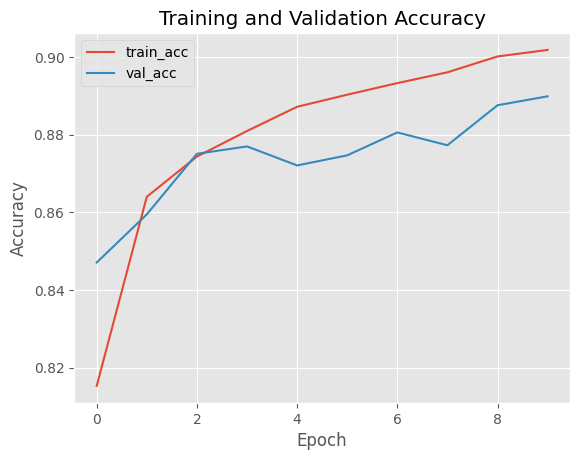

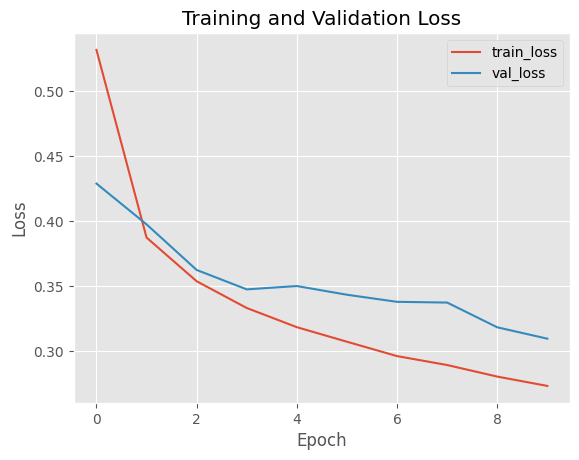

In [ ]:
n_epochs=10
n_batch=64
learning_rate=0.01

model0 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model0.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Historia0 = model0.fit(xtrain, ytrain, validation_data=(xtest, ytest),
                     epochs=n_epochs, batch_size=n_batch)

H = Historia0
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

### Numero de capas convolucionales?

#### Modelo 1

* Epochs = 10
* N_batch = 64
* Learning_rate = 0.01
* Num_conv_layers = 2
* Num_dense_layers = 1
* Filters = 6
* Activation conv = tanh
* Activation dense =
* Kernel_size = (5,5)
* Pool size = (2,2)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7272 - loss: 0.7819 - val_accuracy: 0.8463 - val_loss: 0.4220
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8642 - loss: 0.3820 - val_accuracy: 0.8571 - val_loss: 0.3835
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8762 - loss: 0.3384 - val_accuracy: 0.8745 - val_loss: 0.3447
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8854 - loss: 0.3142 - val_accuracy: 0.8769 - val_loss: 0.3344
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8941 - loss: 0.2899 - val_accuracy: 0.8840 - val_loss: 0.3194
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8997 - loss: 0.2777 - val_accuracy: 0.8881 - val_loss: 0.3106
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9035 - loss: 0.2649 - val_accuracy: 0.8892 - val_loss: 0.3007
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9056 - loss: 0.2594 - val_accuracy: 0.

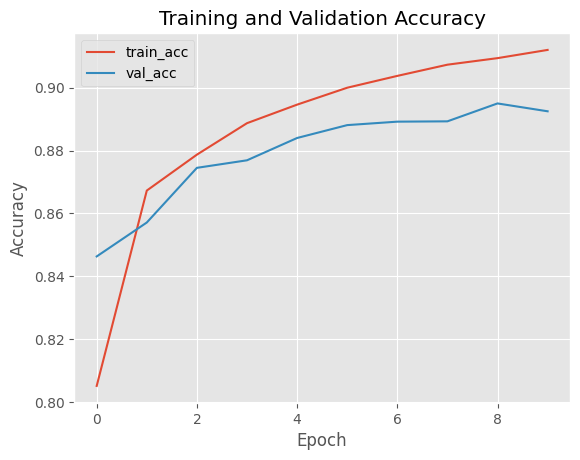

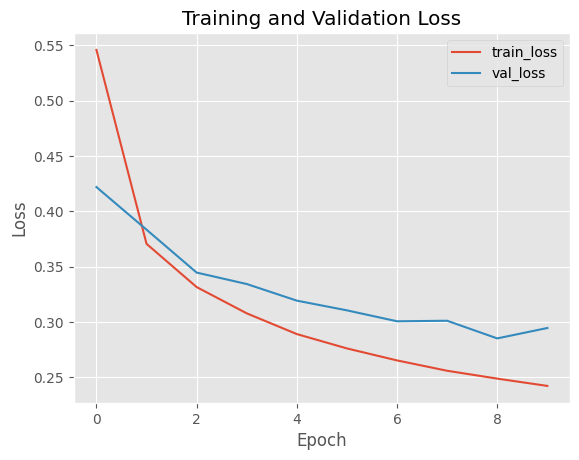

In [ ]:
n_epochs=10
n_batch=64
learning_rate=0.01

model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model1.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Historia1 = model1.fit(xtrain, ytrain, validation_data=(xtest, ytest),
                     epochs=n_epochs, batch_size=n_batch)
H = Historia1

import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

#### Modelo 2

* Epochs = 10
* N_batch = 64
* Learning_rate = 0.01
* Num_conv_layers = 3
* Num_dense_layers = 1
* Filters = 6
* Activation conv = tanh
* Activation dense =
* Kernel_size = (5,5)
* Pool size = (2,2)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6451 - loss: 1.0726 - val_accuracy: 0.8119 - val_loss: 0.5257
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8285 - loss: 0.4804 - val_accuracy: 0.8324 - val_loss: 0.4542
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8444 - loss: 0.4255 - val_accuracy: 0.8438 - val_loss: 0.4255
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8574 - loss: 0.3895 - val_accuracy: 0.8550 - val_loss: 0.4015
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8644 - loss: 0.3701 - val_accuracy: 0.8613 - val_loss: 0.3902
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8698 - loss: 0.3547 - val_accuracy: 0.8591 - val_loss: 0.3870
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8768 - loss: 0.3433 - val_accuracy: 0.8678 - val_loss: 0.3660
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8780 - loss: 0.3345 - val_accuracy: 0.

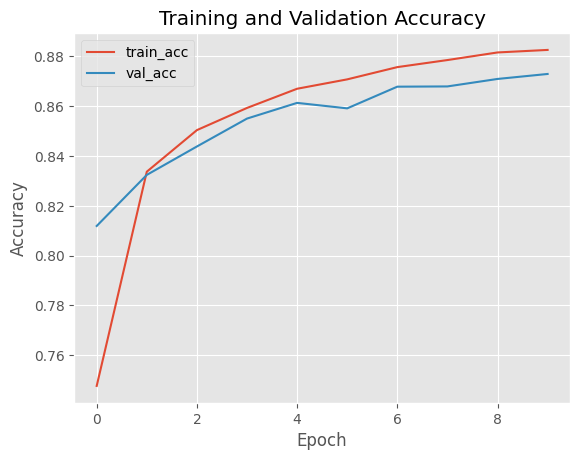

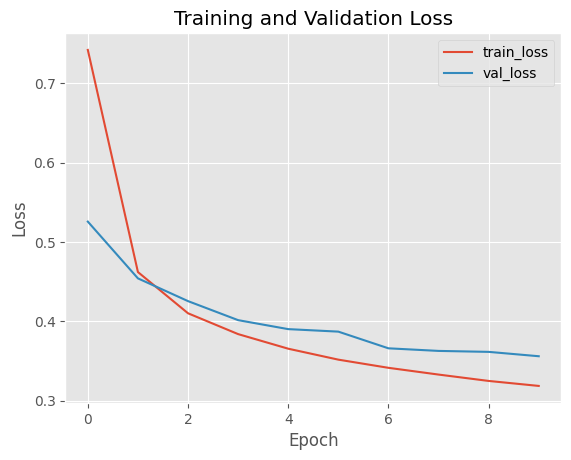

In [ ]:
n_epochs=10
n_batch=64
learning_rate=0.01

model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model2.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Historia2 = model2.fit(xtrain, ytrain, validation_data=(xtest, ytest),
                     epochs=n_epochs, batch_size=n_batch)
H = Historia2

import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

Se optara por dos capas convolucionales.

### ¿Numero de capas densas?

#### Modelo 3

* Epochs = 10
* N_batch = 64
* Learning_rate = 0.01
* Num_conv_layers = 2
* Num_dense_layers = 2
* Filters = 6
* Activation conv = tanh
* Activation dense =
* Kernel_size = (5,5)
* Pool size = (2,2)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7779 - loss: 0.6217 - val_accuracy: 0.8719 - val_loss: 0.3519
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8812 - loss: 0.3268 - val_accuracy: 0.8812 - val_loss: 0.3145
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8979 - loss: 0.2739 - val_accuracy: 0.8944 - val_loss: 0.2894
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9097 - loss: 0.2427 - val_accuracy: 0.8929 - val_loss: 0.2947
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9175 - loss: 0.2232 - val_accuracy: 0.8994 - val_loss: 0.2807
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9261 - loss: 0.1985 - val_accuracy: 0.9029 - val_loss: 0.2642
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9316 - loss: 0.1825 - val_accuracy: 0.9024 - val_loss: 0.2703
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9398 - loss: 0.1639 - val_accuracy: 0.

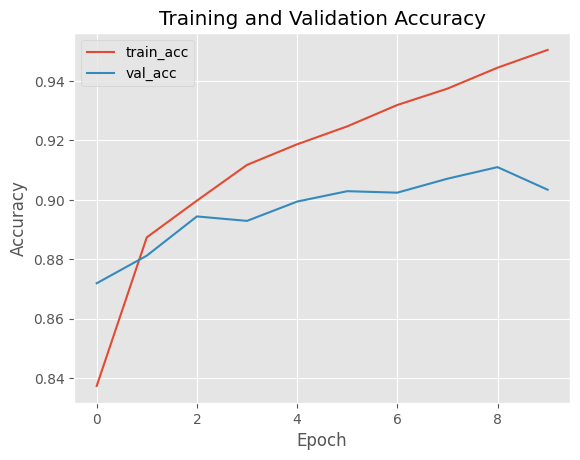

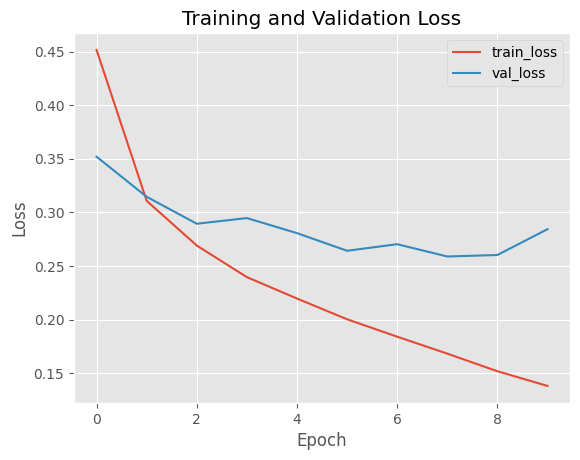

In [ ]:
n_epochs=10
n_batch=64
learning_rate=0.01

model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='tanh'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model3.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Historia3 = model3.fit(xtrain, ytrain, validation_data=(xtest, ytest),
                     epochs=n_epochs, batch_size=n_batch)
H = Historia3

import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

#### Modelo 4

* Epochs = 10
* N_batch = 64
* Learning_rate = 0.01
* Num_conv_layers = 2
* Num_dense_layers = 3
* Filters = 6
* Activation conv = tanh
* Activation dense =
* Kernel_size = (5,5)
* Pool size = (2,2)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7781 - loss: 0.6359 - val_accuracy: 0.8599 - val_loss: 0.3793
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8790 - loss: 0.3314 - val_accuracy: 0.8789 - val_loss: 0.3350
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8963 - loss: 0.2790 - val_accuracy: 0.8930 - val_loss: 0.2893
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9066 - loss: 0.2511 - val_accuracy: 0.8931 - val_loss: 0.2846
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9150 - loss: 0.2273 - val_accuracy: 0.9002 - val_loss: 0.2761
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9240 - loss: 0.2079 - val_accuracy: 0.9007 - val_loss: 0.2726
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9303 - loss: 0.1901 - val_accuracy: 0.9054 - val_loss: 0.2591
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9361 - loss: 0.1778 - val_accuracy: 0.

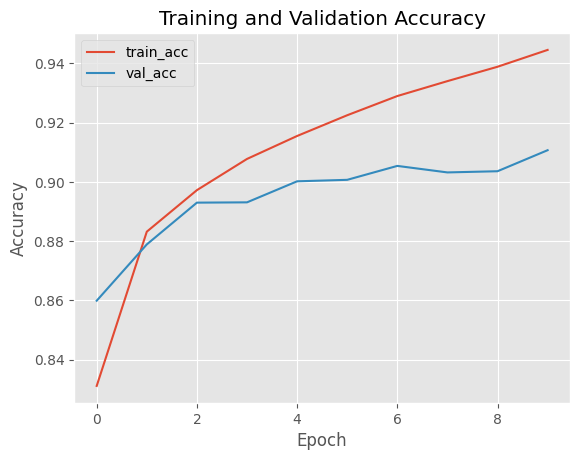

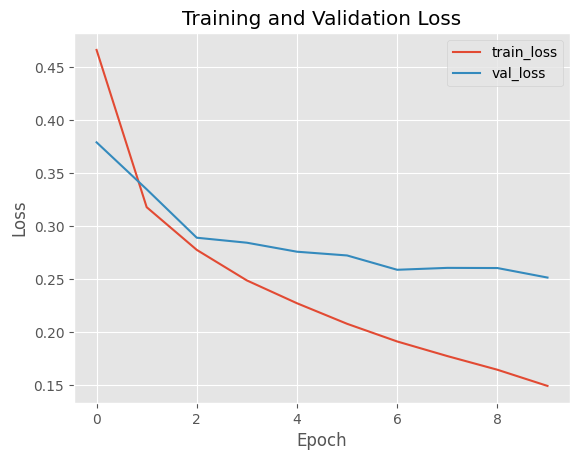

In [ ]:
n_epochs=10
n_batch=64
learning_rate=0.01

model4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='tanh'),
    tf.keras.layers.Dense(84, activation='tanh'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model4.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Historia4 = model4.fit(xtrain, ytrain, validation_data=(xtest, ytest),
                     epochs=n_epochs, batch_size=n_batch)
H = Historia4

import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

Los resultados mejoran por lo que se optaran por 3 capas densas.

### ¿Tamaño de Kernel?

#### Modelo 5

* Epochs = 10
* N_batch = 64
* Learning_rate = 0.01
* Num_conv_layers = 2
* Num_dense_layers = 3
* Activation conv = tanh
* Activation dense = tanh
* Kernel_size = (6,6)
* Pool size = (2,2)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7647 - loss: 0.6430 - val_accuracy: 0.8612 - val_loss: 0.3795
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8810 - loss: 0.3279 - val_accuracy: 0.8800 - val_loss: 0.3317
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8972 - loss: 0.2775 - val_accuracy: 0.8864 - val_loss: 0.3064
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9100 - loss: 0.2445 - val_accuracy: 0.9010 - val_loss: 0.2708
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9160 - loss: 0.2279 - val_accuracy: 0.9016 - val_loss: 0.2773
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9274 - loss: 0.1974 - val_accuracy: 0.9023 - val_loss: 0.2694
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9331 - loss: 0.1810 - val_accuracy: 0.9069 - val_loss: 0.2586
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9418 - loss: 0.1600 - val_accuracy: 0

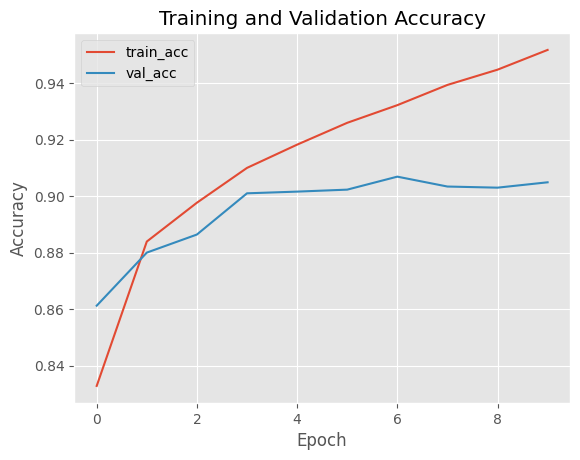

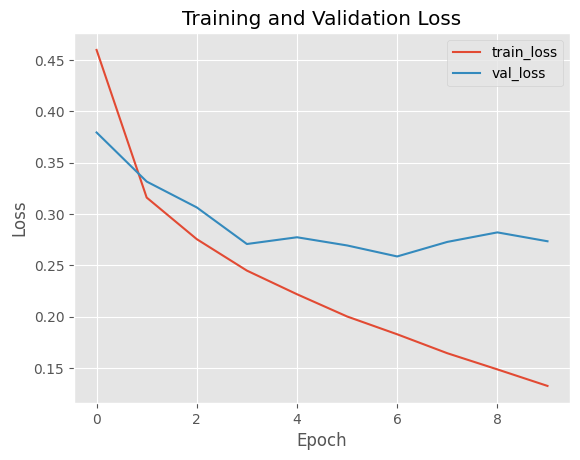

In [ ]:
fn_epochs=10
n_batch=64
learning_rate=0.01

model5 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(6,6), strides=(1,1), padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(6,6), strides=(1,1), padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='tanh'),
    tf.keras.layers.Dense(84, activation='tanh'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model5.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Historia5 = model5.fit(xtrain, ytrain, validation_data=(xtest, ytest),
                     epochs=n_epochs, batch_size=n_batch)
H = Historia5

import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

#### Modelo 6

* Epochs = 10
* N_batch = 64
* Learning_rate = 0.01
* Num_conv_layers = 2
* Num_dense_layers = 3
* Activation conv = tanh
* Activation dense = tanh
* Kernel_size = (3,3)
* Pool size = (2,2)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7854 - loss: 0.6201 - val_accuracy: 0.8714 - val_loss: 0.3627
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8844 - loss: 0.3178 - val_accuracy: 0.8893 - val_loss: 0.3069
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8980 - loss: 0.2786 - val_accuracy: 0.8916 - val_loss: 0.3054
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9074 - loss: 0.2483 - val_accuracy: 0.8980 - val_loss: 0.2809
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9159 - loss: 0.2269 - val_accuracy: 0.9019 - val_loss: 0.2716
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9236 - loss: 0.2082 - val_accuracy: 0.9017 - val_loss: 0.2811
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9300 - loss: 0.1899 - val_accuracy: 0.9070 - val_loss: 0.2635
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9357 - loss: 0.1755 - val_accuracy: 0.

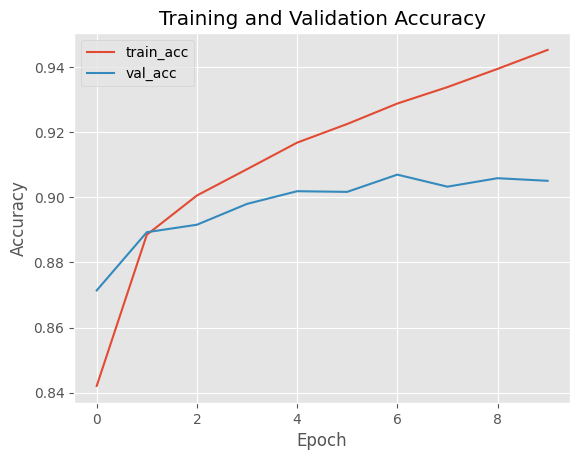

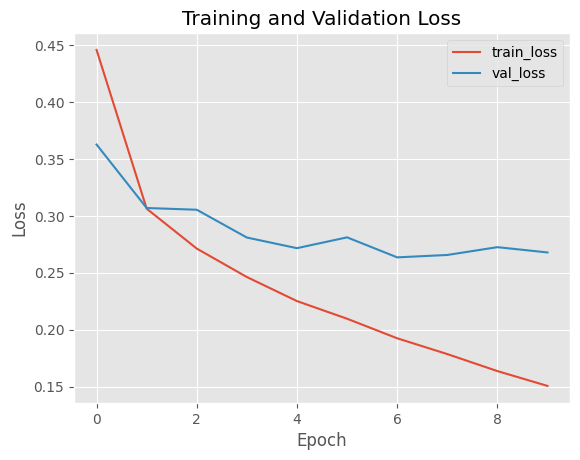

In [ ]:
n_epochs=10
n_batch=64
learning_rate=0.01

model6 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(3,3), strides=(1,1), padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='tanh'),
    tf.keras.layers.Dense(84, activation='tanh'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model6.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Historia6 = model6.fit(xtrain, ytrain, validation_data=(xtest, ytest),
                     epochs=n_epochs, batch_size=n_batch)
H = Historia6

import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

Se mantiene batch size de (5,5)

### ¿Numero de batches?

#### Modelo 7

* Epochs = 10
* N_batch = 32
* Learning_rate = 0.01
* Num_conv_layers = 2
* Num_dense_layers = 3
* Filters = 6
* Activation conv = tanh
* Activation dense =
* Kernel_size = (5,5)
* Pool size = (2,2)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7965 - loss: 0.5638 - val_accuracy: 0.8778 - val_loss: 0.3378
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8880 - loss: 0.3050 - val_accuracy: 0.8759 - val_loss: 0.3359
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9042 - loss: 0.2575 - val_accuracy: 0.8869 - val_loss: 0.3083
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9159 - loss: 0.2280 - val_accuracy: 0.8999 - val_loss: 0.2746
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9220 - loss: 0.2067 - val_accuracy: 0.9043 - val_loss: 0.2731
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9300 - loss: 0.1880 - val_accuracy: 0.9037 - val_loss: 0.2754
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9398 - loss: 0.1607 - val_accuracy: 0.8990 - val_loss: 0.2816
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9468 - loss: 0.1466 

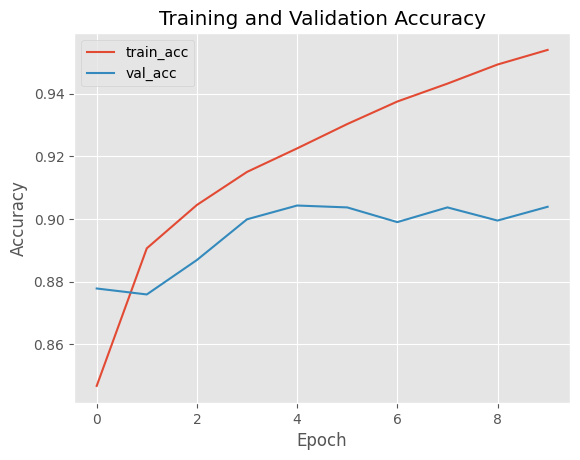

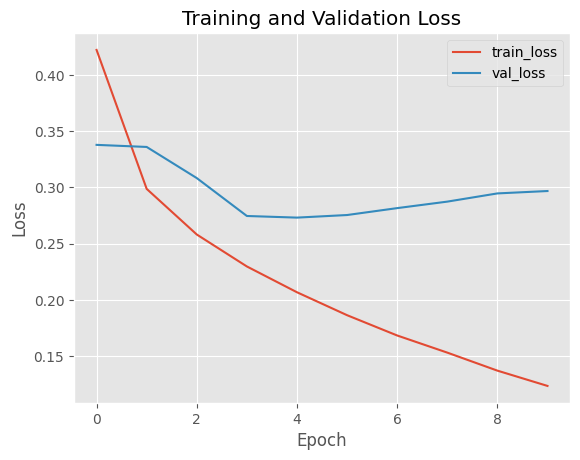

In [ ]:
n_epochs=10
n_batch=32
learning_rate=0.01

model7 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='tanh'),
    tf.keras.layers.Dense(84, activation='tanh'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model7.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Historia7 = model7.fit(xtrain, ytrain, validation_data=(xtest, ytest),
                     epochs=n_epochs, batch_size=n_batch)
H = Historia7

import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

#### Modelo 8

* Epochs = 10
* N_batch = 8
* Learning_rate = 0.01
* Num_conv_layers = 2
* Num_dense_layers = 3
* Filters = 6
* Activation conv = tanh
* Activation dense =
* Kernel_size = (5,5)
* Pool size = (2,2)


Epoch 1/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8231 - loss: 0.4926 - val_accuracy: 0.8743 - val_loss: 0.3395
Epoch 2/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8894 - loss: 0.2967 - val_accuracy: 0.8906 - val_loss: 0.3098
Epoch 3/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9062 - loss: 0.2551 - val_accuracy: 0.8952 - val_loss: 0.2910
Epoch 4/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9158 - loss: 0.2266 - val_accuracy: 0.8983 - val_loss: 0.2837
Epoch 5/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9261 - loss: 0.2011 - val_accuracy: 0.8978 - val_loss: 0.2895
Epoch 6/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9264 - loss: 0.1966 - val_accuracy: 0.8965 - val_loss: 0.2914
Epoch 7/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9316 - loss: 0.1859 - val_accuracy: 0.9009 - val_loss: 0.2903
Epoch 8/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9378 - loss: 0

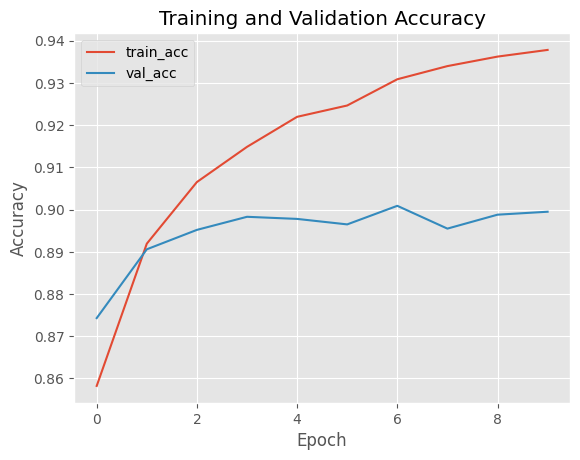

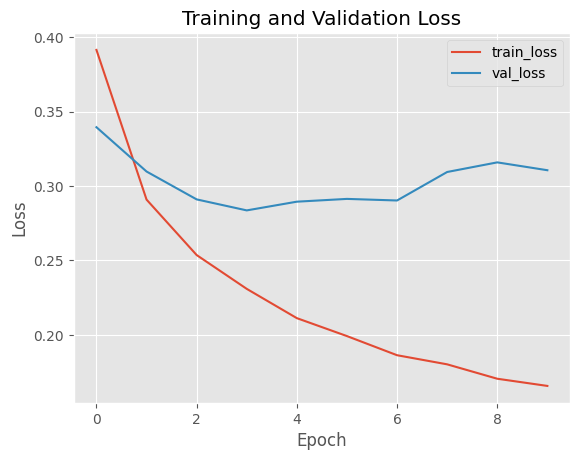

In [ ]:
n_epochs=10
n_batch=8
learning_rate=0.01

model8 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='tanh'),
    tf.keras.layers.Dense(84, activation='tanh'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model8.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Historia8 = model8.fit(xtrain, ytrain, validation_data=(xtest, ytest),
                     epochs=n_epochs, batch_size=n_batch)
H = Historia8

import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

#### Modelo 9

* Epochs = 10
* N_batch = 256
* Learning_rate = 0.01
* Num_conv_layers = 2
* Num_dense_layers = 3
* Filters = 6
* Activation conv = tanh
* Activation dense =
* Kernel_size = (5,5)
* Pool size = (2,2)


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7188 - loss: 0.8394 - val_accuracy: 0.8535 - val_loss: 0.4028
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8683 - loss: 0.3693 - val_accuracy: 0.8713 - val_loss: 0.3514
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8837 - loss: 0.3196 - val_accuracy: 0.8777 - val_loss: 0.3308
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8934 - loss: 0.2910 - val_accuracy: 0.8851 - val_loss: 0.3244
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8970 - loss: 0.2778 - val_accuracy: 0.8913 - val_loss: 0.2968
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9101 - loss: 0.2509 - val_accuracy: 0.8897 - val_loss: 0.3020
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9126 - loss: 0.2378 - val_accuracy: 0.8978 - val_loss: 0.2809
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9183 - loss: 0.2237 - val_accuracy: 0

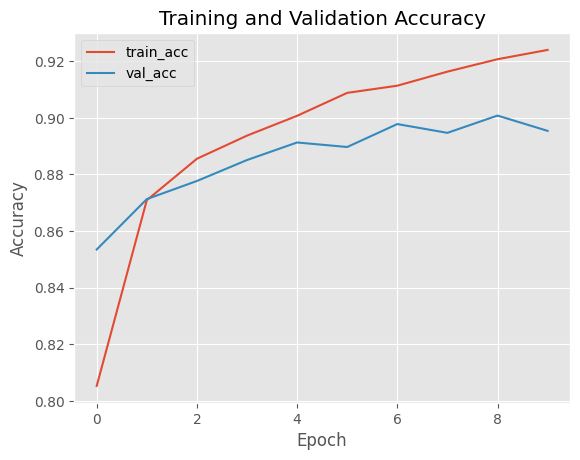

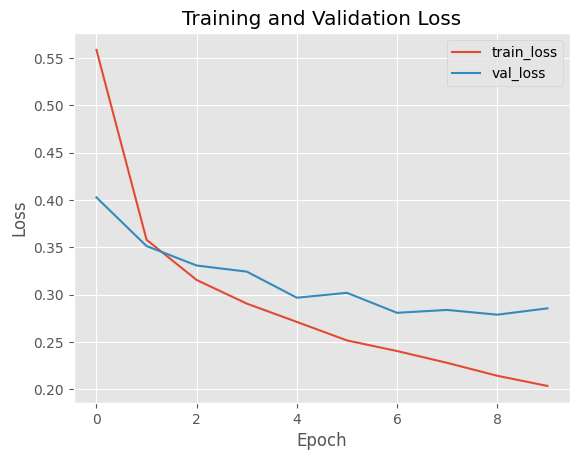

In [ ]:
n_epochs=10
n_batch=256
learning_rate=0.01

model9 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='tanh'),
    tf.keras.layers.Dense(84, activation='tanh'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model9.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Historia9 = model9.fit(xtrain, ytrain, validation_data=(xtest, ytest),
                     epochs=n_epochs, batch_size=n_batch)
H = Historia9

import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

Se mantiene batch size de 64

### Atacar problemas de overfitting

Comienza a verse ligero overfitting en las epochs tardias de los modelos por lo que se implementaran varias tecnicas para corregir

### Early Stopping y Mas Epochs

Para tener mas epochs sin perjudicar el modelo, se utiliza early stopping para quedarse con el mejor modelo de todas las epochs, detiendose automaticamente despues de 10 epochs sin mejoras en validation accuracy.

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

#### Modelo 10

* Epochs = 100
* N_batch = 64
* Learning_rate = 0.01
* Num_conv_layers = 2
* Num_dense_layers = 3
* Filters = 6
* Activation conv = tanh
* Activation dense =
* Kernel_size = (5,5)
* Pool size = (2,2)


Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7631 - loss: 0.6682 - val_accuracy: 0.8685 - val_loss: 0.3612
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8800 - loss: 0.3325 - val_accuracy: 0.8842 - val_loss: 0.3168
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8978 - loss: 0.2790 - val_accuracy: 0.8949 - val_loss: 0.2929
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9090 - loss: 0.2482 - val_accuracy: 0.8901 - val_loss: 0.2975
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9178 - loss: 0.2219 - val_accuracy: 0.8979 - val_loss: 0.2826
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9286 - loss: 0.1969 - val_accuracy: 0.9057 - val_loss: 0.2629
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9316 - loss: 0.1835 - val_accuracy: 0.9042 - val_loss: 0.2616
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9387 - loss: 0.1675 - val_accu

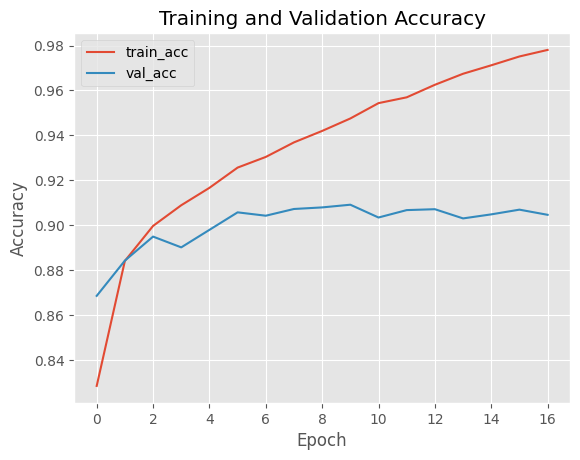

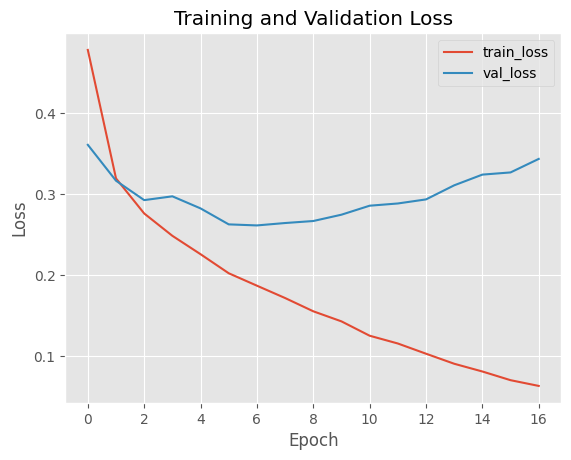

In [ ]:
n_epochs=100
n_batch=64
learning_rate=0.01

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

model10 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='tanh'),
    tf.keras.layers.Dense(84, activation='tanh'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model10.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Historia10 = model10.fit(xtrain, ytrain, validation_data=(xtest, ytest),
                     epochs=n_epochs, batch_size=n_batch, callbacks=[early_stopping])
H = Historia10

n_epochs = len(H.history["accuracy"])

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

Ahora aplicamos BatchNormalization

In [15]:
from tensorflow.keras.layers import BatchNormalization

#### Modelo 11

* Epochs = 100
* N_batch = 64
* Learning_rate = 0.01
* Num_conv_layers = 2
* Num_dense_layers = 3
* Filters = 6
* Activation conv = tanh
* Activation dense =
* Kernel_size = (5,5)
* Pool size = (2,2)


Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8154 - loss: 0.5258 - val_accuracy: 0.8757 - val_loss: 0.3486
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8932 - loss: 0.2945 - val_accuracy: 0.8785 - val_loss: 0.3318
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9077 - loss: 0.2484 - val_accuracy: 0.8897 - val_loss: 0.3042
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9182 - loss: 0.2245 - val_accuracy: 0.8913 - val_loss: 0.2944
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9264 - loss: 0.1996 - val_accuracy: 0.8975 - val_loss: 0.2885
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9333 - loss: 0.1823 - val_accuracy: 0.8940 - val_loss: 0.3002
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9391 - loss: 0.1674 - val_accuracy: 0.8992 - val_loss: 0.3016
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9423 - loss: 0.1512 - val_acc

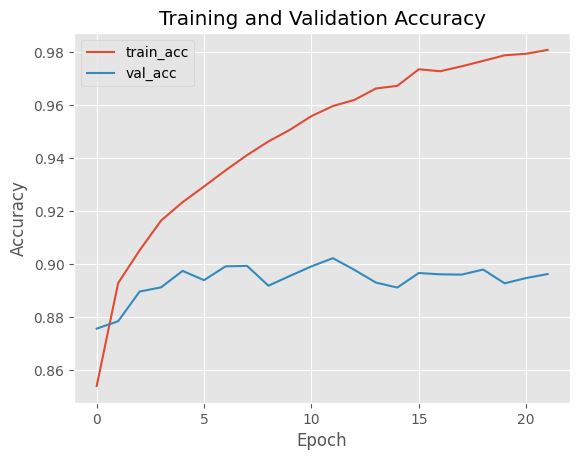

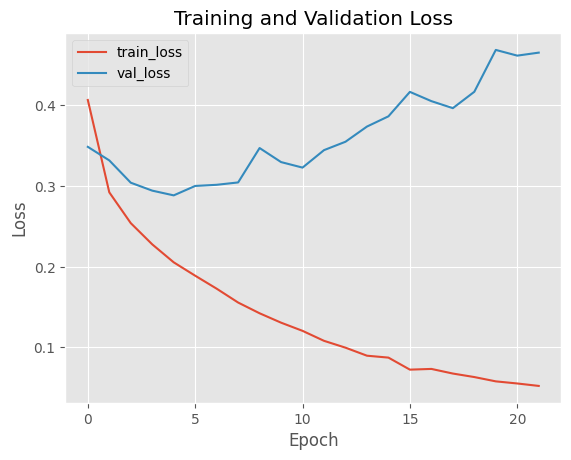

In [ ]:
n_epochs=100
n_batch=64
learning_rate=0.01

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

model11 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='tanh'),
    tf.keras.layers.Dense(84, activation='tanh'),
    BatchNormalization(),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model11.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Historia11 = model11.fit(xtrain, ytrain, validation_data=(xtest, ytest),
                     epochs=n_epochs, batch_size=n_batch, callbacks=[early_stopping])
H = Historia11

n_epochs = len(H.history["accuracy"])

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

### L2

In [13]:
from tensorflow.keras.regularizers import l2

#### Modelo 12

* Epochs = 100
* N_batch = 64
* Learning_rate = 0.01
* Num_conv_layers = 2
* Num_dense_layers = 3
* Filters = 6
* Activation conv = tanh
* Activation dense =
* Kernel_size = (5,5)
* Pool size = (2,2)


Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8114 - loss: 0.5539 - val_accuracy: 0.8806 - val_loss: 0.3402
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8916 - loss: 0.3105 - val_accuracy: 0.8762 - val_loss: 0.3508
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9053 - loss: 0.2666 - val_accuracy: 0.8852 - val_loss: 0.3358
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9163 - loss: 0.2338 - val_accuracy: 0.8942 - val_loss: 0.3090
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9258 - loss: 0.2134 - val_accuracy: 0.8866 - val_loss: 0.3250
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9343 - loss: 0.1911 - val_accuracy: 0.8884 - val_loss: 0.3243
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9378 - loss: 0.1804 - val_accuracy: 0.8932 - val_loss: 0.3298
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9440 - loss: 0.1614 - val_acc

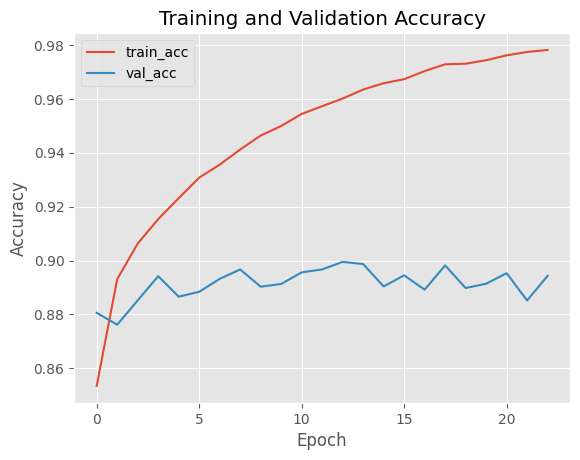

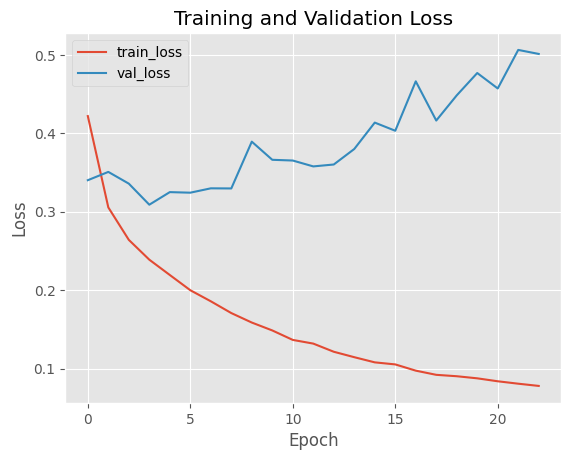

In [ ]:
n_epochs=100
n_batch=64
learning_rate=0.01

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

model12 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='tanh',kernel_regularizer=l2(0.001)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='same', activation='tanh',kernel_regularizer=l2(0.001)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='tanh'),
    tf.keras.layers.Dense(84, activation='tanh'),
    BatchNormalization(),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model12.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Historia12 = model12.fit(xtrain, ytrain, validation_data=(xtest, ytest),
                     epochs=n_epochs, batch_size=n_batch, callbacks=[early_stopping])
H = Historia12

n_epochs = len(H.history["accuracy"])

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

### Dropout

#### Modelo 13

* Epochs = 100
* N_batch = 64
* Learning_rate = 0.01
* Num_conv_layers = 2
* Num_dense_layers = 3
* Filters = 6
* Activation conv = tanh
* Activation dense =
* Kernel_size = (5,5)
* Pool size = (2,2)


Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7224 - loss: 0.8034 - val_accuracy: 0.8526 - val_loss: 0.4136
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8376 - loss: 0.4552 - val_accuracy: 0.8525 - val_loss: 0.3951
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8609 - loss: 0.3914 - val_accuracy: 0.8813 - val_loss: 0.3426
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8698 - loss: 0.3690 - val_accuracy: 0.8799 - val_loss: 0.3421
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8715 - loss: 0.3619 - val_accuracy: 0.8857 - val_loss: 0.3213
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8781 - loss: 0.3492 - val_accuracy: 0.8892 - val_loss: 0.3162
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8804 - loss: 0.3380 - val_accuracy: 0.8870 - val_loss: 0.3172
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8827 - loss: 0.3299 - val_acc

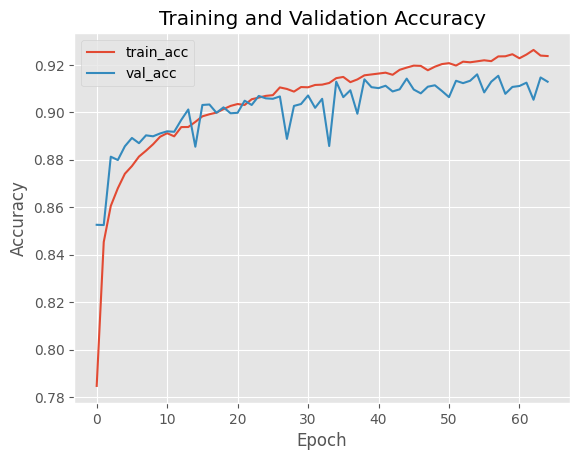

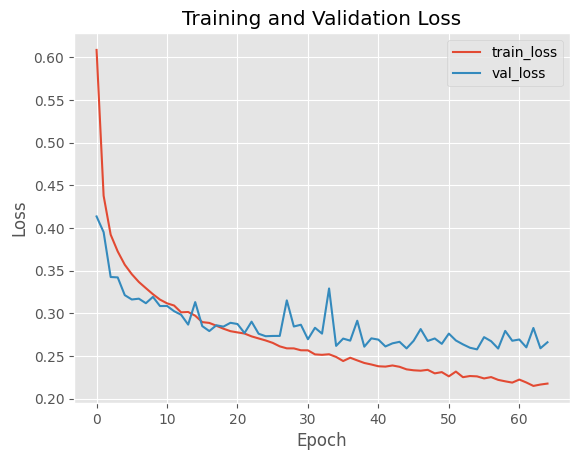

In [ ]:
n_epochs=100
n_batch=64
learning_rate=0.01

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

model13 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='tanh',kernel_regularizer=l2(0.001)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='same', activation='tanh',kernel_regularizer=l2(0.001)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='tanh'),
    tf.keras.layers.Dense(84, activation='tanh'),
    BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model13.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Historia13 = model13.fit(xtrain, ytrain, validation_data=(xtest, ytest),
                     epochs=n_epochs, batch_size=n_batch, callbacks=[early_stopping])
H = Historia13

n_epochs = len(H.history["accuracy"])

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

### Disminuir Leanring Rate

#### Modelo 14

* Epochs = 100
* N_batch = 64
* Learning_rate = 0.001
* Num_conv_layers = 2
* Num_dense_layers = 3
* Filters = 6
* Activation conv = tanh
* Activation dense =
* Kernel_size = (5,5)
* Pool size = (2,2)


Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.7300 - loss: 0.7817 - val_accuracy: 0.8556 - val_loss: 0.4019
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8423 - loss: 0.4456 - val_accuracy: 0.8699 - val_loss: 0.3785
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8597 - loss: 0.3918 - val_accuracy: 0.8736 - val_loss: 0.3533
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8684 - loss: 0.3735 - val_accuracy: 0.8758 - val_loss: 0.3487
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8728 - loss: 0.3572 - val_accuracy: 0.8912 - val_loss: 0.3161
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8782 - loss: 0.3421 - val_accuracy: 0.8902 - val_loss: 0.3131
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8819 - loss: 0.3337 - val_accuracy: 0.8834 - val_loss: 0.3389
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8829 - loss: 0.3275 - val_ac

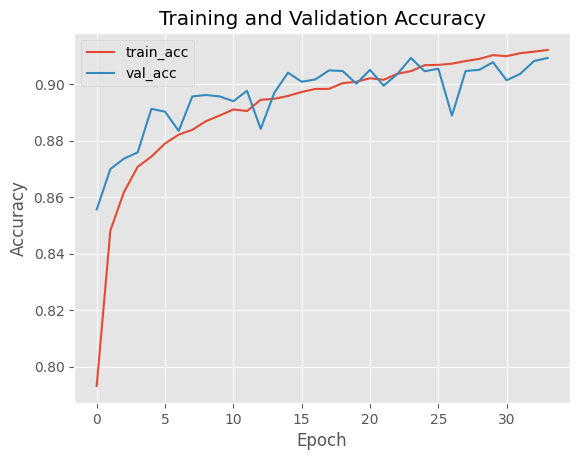

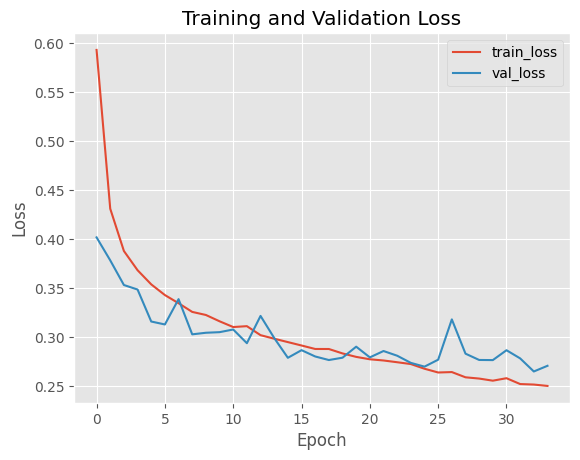

In [ ]:
n_epochs=100
n_batch=64
learning_rate=0.001

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

model14 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='tanh',kernel_regularizer=l2(0.001)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='same', activation='tanh',kernel_regularizer=l2(0.001)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='tanh'),
    tf.keras.layers.Dense(84, activation='tanh'),
    BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model14.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Historia14 = model14.fit(xtrain, ytrain, validation_data=(xtest, ytest),
                     epochs=n_epochs, batch_size=n_batch, callbacks=[early_stopping])
H = Historia14

n_epochs = len(H.history["accuracy"])

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

### Activation

Se cambia el activation de los convolutional y dense layers por relu

#### Modelo 15

* Epochs = 100
* N_batch = 64
* Learning_rate = 0.001
* Num_conv_layers = 2
* Num_dense_layers = 3
* Filters = 6
* Activation conv = tanh
* Activation dense =
* Kernel_size = (5,5)
* Pool size = (2,2)


Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6666 - loss: 0.9537 - val_accuracy: 0.8566 - val_loss: 0.4083
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8381 - loss: 0.4585 - val_accuracy: 0.8742 - val_loss: 0.3589
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8587 - loss: 0.3923 - val_accuracy: 0.8784 - val_loss: 0.3544
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8711 - loss: 0.3598 - val_accuracy: 0.8858 - val_loss: 0.3213
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8796 - loss: 0.3419 - val_accuracy: 0.8697 - val_loss: 0.3607
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8825 - loss: 0.3298 - val_accuracy: 0.8936 - val_loss: 0.3013
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8885 - loss: 0.3172 - val_accuracy: 0.8962 - val_loss: 0.2969
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8909 - loss: 0.3097 - val_ac

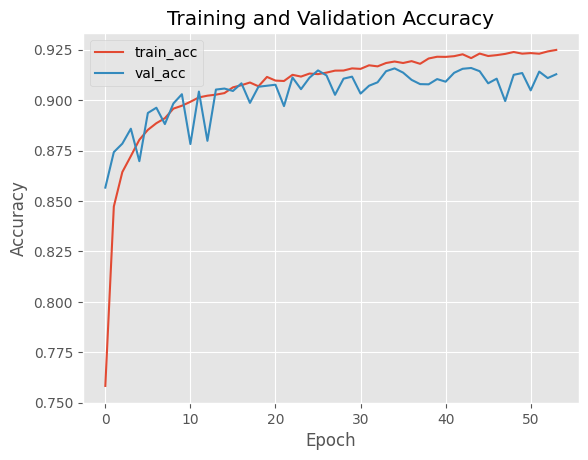

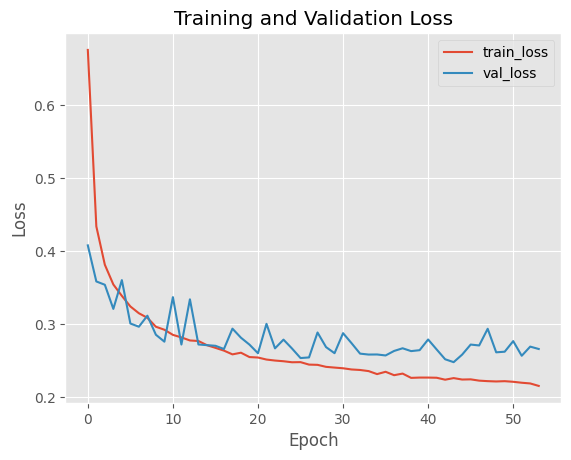

In [ ]:
n_epochs=100
n_batch=64
learning_rate=0.001

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

model15 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu',kernel_regularizer=l2(0.001)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu',kernel_regularizer=l2(0.001)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model15.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Historia15 = model15.fit(xtrain, ytrain, validation_data=(xtest, ytest),
                     epochs=n_epochs, batch_size=n_batch, callbacks=[early_stopping])
H = Historia15

n_epochs = len(H.history["accuracy"])

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

### Aumentar filtros de capas convolucionales

## Modelo final

#### Modelo 16

* Epochs = 100
* N_batch = 64
* Learning_rate = 0.001
* Num_conv_layers = 2
* Num_dense_layers = 3
* Filters = 32
* Activation conv = relu
* Activation dense = relu
* Kernel_size = (5,5)
* Pool size = (2,2)


In [18]:
n_epochs=100
n_batch=64
learning_rate=0.001

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

model16 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu',kernel_regularizer=l2(0.001), input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu',kernel_regularizer=l2(0.001)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model16.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model16.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 7, 7, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 120)                 │         376,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 84)                  │             336 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 84)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 440,142 (1.68 MB)

 Trainable params: 439,846 (1.68 MB)

 Non-trainable params: 296 (1.16 KB)

Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.7652 - loss: 0.7221 - val_accuracy: 0.8722 - val_loss: 0.4024
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8778 - loss: 0.3819 - val_accuracy: 0.8882 - val_loss: 0.3612
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8922 - loss: 0.3431 - val_accuracy: 0.8872 - val_loss: 0.3644
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8983 - loss: 0.3221 - val_accuracy: 0.9012 - val_loss: 0.3217
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9076 - loss: 0.3033 - val_accuracy: 0.9048 - val_loss: 0.3176
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9096 - loss: 0.2962 - val_accuracy: 0.9052 - val_loss: 0.3120
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9120 - loss: 0.2955 - val_accuracy: 0.9101 - val_loss: 0.2969
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9166 - loss: 0.2793 - val_ac

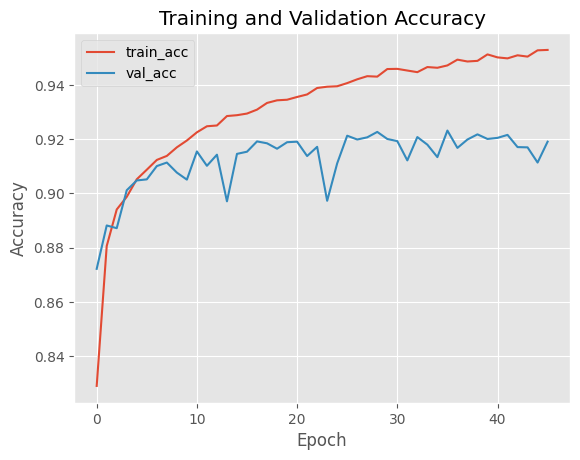

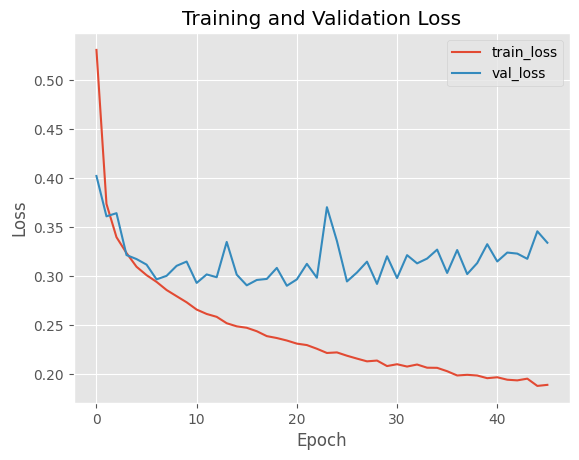

In [ ]:
Historia16 = model16.fit(xtrain, ytrain, validation_data=(xtest, ytest),
                     epochs=n_epochs, batch_size=n_batch, callbacks=[early_stopping])
H = Historia16

n_epochs = len(H.history["accuracy"])

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

Este modelo final (Modelo 16) produce un val accuracy de 92.32% y este resultado es satisfactorio

Se reutiliza el codigo de la actividad 2 para desplegar resultados

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(label_dicc[predicted_label],
                                100*np.max(predictions_array),
                                label_dicc[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


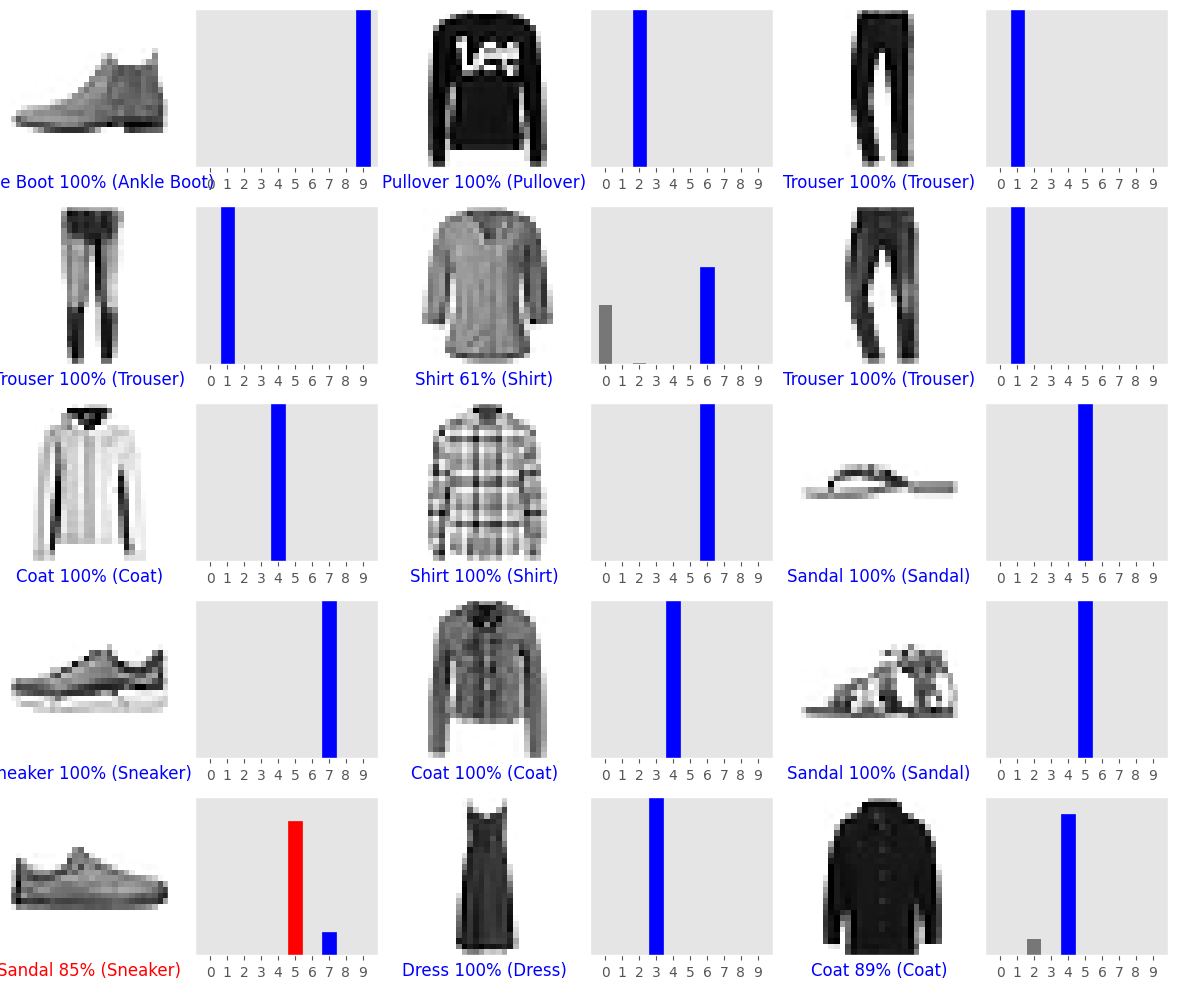

In [ ]:
predictions = model16.predict(xtest)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, xtest)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

Reporte de Scikit Learn

In [ ]:
test_labels = np.argmax(ytest, axis=1)
predictions_label = np.argmax(predictions, axis=1)

In [ ]:
report = classification_report(test_labels, predictions_label, target_names= list(label_dicc.values()))
print(report)

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.83      0.86      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.90      0.87      0.89      1000
       Dress       0.89      0.95      0.92      1000
        Coat       0.89      0.89      0.89      1000
      Sandal       0.97      1.00      0.98      1000
       Shirt       0.76      0.79      0.78      1000
     Sneaker       0.98      0.97      0.97      1000
         Bag       0.99      0.98      0.99      1000
  Ankle Boot       0.98      0.97      0.98      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

